{/* cspell:ignore nflips fliplist qcoin squareroot qnot qsqrtnot qphase qhadamard */}

# Quantum Coins — a module on superposition and interference

For this Qiskit in Classrooms module, students must have a working Python environment with the following packages installed:
- `qiskit` v2.1.0 or newer
- `qiskit-ibm-runtime` v0.40.1 or newer
- `qiskit-aer` v0.17.0 or newer
- `qiskit.visualization`
- `numpy`
- `pylatexenc`

To set up and install the packages above, see the [Install Qiskit](/docs/guides/install-qiskit) guide.
In order to run jobs on real quantum computers, students will need to set up an account with IBM Quantum&reg; by following the steps in the [Set up your IBM Cloud account](/docs/guides/cloud-setup) guide.

This module was tested and used 47 seconds of QPU time. This is an estimate only. Your actual usage may vary.

In [ ]:
# Uncomment and modify this line as needed to install dependencies
#!pip install 'qiskit>=2.1.0' 'qiskit-ibm-runtime>=0.40.1' 'qiskit-aer>=0.17.0' 'numpy' 'pylatexenc'

Watch the module walkthrough by Dr. Katie McCormick below, or click [here](https://www.youtube.com/watch?v=TZ-sUHK8vVQ&list=PLOFEBzvs-Vvrs2fuvsuT039ariYPsua3d&index=6) to watch it on YouTube.

-------


<IBMVideo id="134413671" title="Katie McCormick explains quantum superposition, and explores measurements of it on a real quantum computer."/>

## Introduction

In this module, we'll explore one of the core principles at the heart of quantum theory: superposition. In our everyday experience, objects always have definite features. Their location, size, shape, color - everything about them - is determined and certain, even if we the observer haven’t yet measured them. In the quantum world, this isn’t necessarily the case. A quantum object can be in something called a “superposition” of multiple classically allowed states. When the superposition is measured, it will randomly “collapse” to one of those states.

In some ways, measuring a superposition state is like flipping a coin: there is no way to know ahead of time which way it will land. This fundamental indeterminism is and uncomfortable aspect of quantum mechanics that even Einstein had trouble with. He famously said, “God does not play dice” about this randomness. But, as we’ll see, God in fact does play dice - and flip coins.

We’re going to think about a classical coin flip as an analogy to the measurement of a superposition state. And - by playing with a "quantum coin" using Qiskit and a qubit on an IBM&reg; quantum processor - we'll quickly find the limits of that analogy.

### Classical coin

Let's start with a classical coin. Toss a coin, and it will land either heads up or heads down, with 50$~$% chance of each. While in *principle*, one could calculate which side the coin will land on if they knew the precise initial conditions of the coin and the force/torque of the flip, in *practice*, there is no way to know a priori which side the coin will land on. That's why we use the coin flip as a canonical example of a *classical probabilistic state*, where the outcome is essentially random. We can write the state of the coin before it lands to reflect this 50/50 probability:

$$
S(coin) =  \frac{1}{2}|up\rangle + \frac{1}{2}|down\rangle
$$

Here, the two terms represent the two possible outcomes of the flip, and their coefficients represent the probabilities of each of the outcomes. Note that typically, the "$|\rangle$" (known as a "ket") is used to represent a quantum state, but here, we are talking about a *classical* probabilistic state. See [Lesson 1: Single Systems](/learning/courses/basics-of-quantum-information/single-systems/introduction) in the Basics of Quantum Information course to learn more about how we represent classical and quantum information.

If we were to flip a coin 1000 times and record the number of heads up and down, we would get something like this:

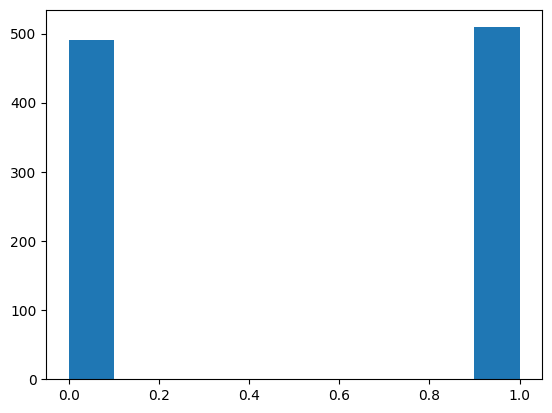

In [1]:
# import necessary packages:
import numpy as np
import matplotlib.pyplot as plt
import random


nflips = 1000
fliplist = [random.randint(0, 1) for f in range(nflips)]


# bar plots using get_gaussian_probs function
plt.hist(fliplist)
plt.show()

### Quantum coin

We can create a similar probabilistic state using a qubit on our quantum computer. Like the coin flip, a qubit also can be measured in two possible states: $|0\rangle$ and $|1\rangle$. We create the probabilistic, "superposition" state by starting in the state $|0\rangle$, and then applying something called a Hadamard gate to the qubit. This puts it in an equal superposition of $|0\rangle$ and $|1\rangle$. Note that while this superposition state may look and behave like the coin at first blush, we will soon see that there is much more to it than that. The point of this module is to show you that a superposition is not the same as a classical coin flip.

So, since the qubit is in an equal superposition of 0 and 1, when we measure the qubit, there will be a 50% chance we measure $|0\rangle$, 50% chance we measure $|1\rangle$. We write this state a little differently from the classical probabilistic case, for reasons that will become clear later:

$$
|\psi\rangle = \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle
$$

Here, the probabilities of measuring each of the two states are **no longer** equal to the coefficients, as was the case in the classical probabilistic state above. Instead, it is the **square** of the coefficients that gives us the probabilities, and each of these coefficients can now be complex, meaning they can have both real and imaginary parts.

Despite these differences, though, the outcome of measuring this state is essentially the same as flipping a coin.

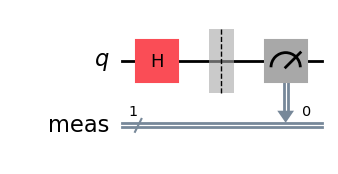

In [2]:
from qiskit import QuantumCircuit

qcoin = QuantumCircuit(1)
qcoin.h(0)
qcoin.measure_all()

qcoin.draw("mpl")

So, in effect, applying the Hadamard gate is the analogue to flipping a coin. And just like we flipped the coin 1000 times to look at the statistics of the coin landing heads up or down, we can do something similar on Qiskit with our “quantum coin." We can use a Qiskit primitive called `Sampler`, which will repeat a circuit several times to sample the statistics of the resulting state.

First, we load the Qiskit Runtime service and primitives, then we select a backend on which to run the circuit.

There is code below for saving your credentials upon first use. Be sure to delete this information from the notebook after saving it to your environment, so that your credentials are not accidentally shared when you share the notebook. See [Set up your IBM Cloud account](/docs/guides/initialize-account) and [Initialize the service in an untrusted environment](/docs/guides/cloud-setup-untrusted) for more guidance.

In [4]:
# Load the Qiskit Runtime service
from qiskit_ibm_runtime import QiskitRuntimeService

# Syntax for first saving your token.  Delete these lines after saving your credentials.
# QiskitRuntimeService.save_account(channel='ibm_quantum_platform', instance = '<YOUR_IBM_INSTANCE_CRN>', token='<YOUR-API_KEY>', overwrite=True, set_as_default=True)
# service = QiskitRuntimeService(channel='ibm_quantum_platform')

# Load saved credentials
service = QiskitRuntimeService()

In [12]:
# Load the Runtime primitive and session
from qiskit_ibm_runtime import (
    SamplerV2 as Sampler,
    EstimatorV2 as Estimator,
)

# Use the least busy backend
backend = service.least_busy()
print(backend.name)

ibm_torino


If you don't have any more time available on your account, you can also choose to run this on a simulator instead. Just uncomment the code and run the cell below to do so:

In [10]:
## Use a local simulator

from qiskit_aer import AerSimulator

## Generate a simulator that mimics the real quantum system
## If 'backend' from the IBM Quantum setup hasn't been defined, use a plain AerSimulator.
try:
    backend_sim = AerSimulator.from_backend(backend)
except NameError:
    # If backend was not defined (e.g., IBM Quantum setup was skipped),
    # use a plain AerSimulator without a noise model.
    backend_sim = AerSimulator()

## Import a sampler and estimator, this time from qiskit (we will import from Runtime for real hardware)

from qiskit.primitives import BackendSamplerV2
sampler_sim = BackendSamplerV2(backend = backend_sim)
from qiskit.primitives import BackendEstimatorV2
estimator_sim = BackendEstimatorV2(backend = backend_sim)

In [13]:
## Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qcoin)

In [14]:
## Execute

# On real hardware:
sampler = Sampler(mode=backend)
pubs = [qc_isa]
job = sampler.run(pubs, shots=1000)
res = job.result()

counts = res[0].data.meas.get_counts()

# or with Aer simulator with noise model from real backend
# job = sampler_sim.run([qc_isa])
# counts=job.result()[0].data.meas.get_counts()

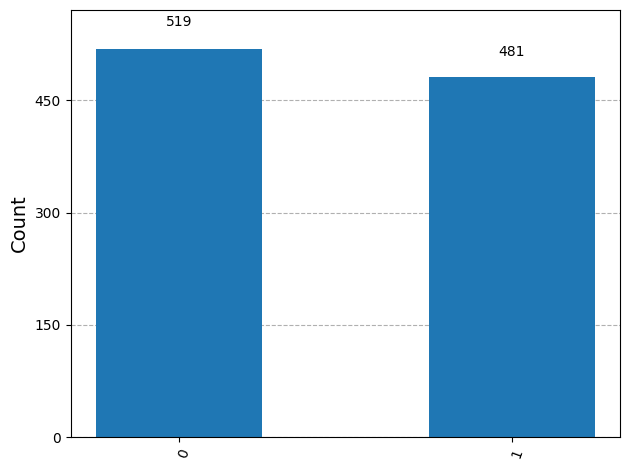

In [15]:
## Analysis
from qiskit.visualization import plot_histogram

plot_histogram(counts)

With 1000 samples of the circuit above, we have something that looks basically identical to the classical coin histogram, up to some statistical fluctuation.

In addition to sampling the statistics of the quantum coin, we can also use another Qiskit primitive called `Estimator` to measure the so-called *expectation value* of an *observable* of the state. To illustrate what this expectation value is, let's use the classical coin as an example. Say you're using the coin to gamble: every time you flip the coin and it lands "heads up," you win one dollar. But every time it lands "heads down," you lose one dollar. If you want to know how much money you're expected to get each flip (the expectation value of the observable "money"), then you would calculate:

$$
E(money) = \frac{1}{2} (+ \text{1 dollar}) +  \frac{1}{2} (- \text{1 dollar}) = \text{0 dollars}
$$

Since you're equally likely to win a dollar as you are to lose a dollar, the expectation value is $0.

Similarly, with a quantum state, we can calculate the expectation value of the observable "Z", where Z is the Pauli matrix with values +1 and -1 associated with the states $|0\rangle$ and $|1\rangle$, respectively.

$$
\langle \psi|Z|\psi \rangle = \frac{1}{2} \langle 0 | Z | 0 \rangle +  \frac{1}{2} \langle 1 | Z | 1 \rangle = \frac{1}{2} (+1) +  \frac{1}{2}(-1) = 0
$$

In [17]:
from qiskit.quantum_info import Pauli

qcoin = QuantumCircuit(1)
qcoin.h(0)

# for Estimator, we do not apply the measurement to the circuit

In [29]:
## Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

obs = Pauli("Z")

qc_isa = pm.run(qcoin)
obs_isa = obs.apply_layout(layout=qc_isa.layout)

In [20]:
## Execute

# On real hardware:
estimator = Estimator(mode=backend)
pubs = [(qc_isa, obs_isa)]
job = estimator.run([[qc_isa, obs_isa]])
res = job.result()

# On a simulator:
# job = estimator_sim.run([[qc_isa, obs_isa]])
# res=job.result()

print(res[0].data.evs)

-0.0148021633931113


We get an expectation value of 0, as expected (hah). This is another way to confirm that indeed, there is an equal probability of measuring or 0 and 1, and appears to behave like a coin flip.

At this point, the "quantum coin" looks exactly like the classical coin. But in the next section, we'll do some experiments that will reveal the fundamental differences between the two.

## The quantum revealed: an experiment in three dimensions

Let's do a thought experiment: Say you flip a coin in the air, and rather than let it fall to the ground, you have the coordination to clap as it passes between your hands and sandwich the coin between your palms. Now, instead of the coin being either heads up or down, it's heads left or right.

#### Check your understanding
Read the question(s) below, think about your answer, then click the triangle to reveal the solution.

<details>
<summary>

What is the probability of each of these outcomes, heads left or heads right?

</summary>

__Answer:__

The probability will still be 50-50. It shouldn't matter which dimension along which we choose to measure the outcome of the coin flip.

</details>

Hopefully, you answered that the probability of finding heads left or right is still 50-50. The dimension along which the coin flip is measured should not affect the probability of the outcomes.

But how would things look different for our quantum coin? Let's check.

We can make our quantum superposition in the same way we did last time, with a Hadamard gate. To measure “heads left or right” on our quantum coin, we can do what we did with the classical coin: measure along a different axis. Our standard measurements on the quantum computer are along the vertical axis, just like the usual “heads up or down” measurement of the classical coin. But we can also ask our quantum coin if it’s heads left or right, or equivalently, if it’s in the states $|+\rangle$ or $|-\rangle$, which are pointing along the $x$-axis. `Sampler` only samples in the measurement basis Z, but we can use `Estimator` to give us the expectation value of X. The values of X are +1 and -1 for the states $|+\rangle$ or $|-\rangle$, respectively.


#### Check your understanding
Read the question below, think about your answer, then click the triangle to reveal the solution.

<details>
<summary>

If the quantum coin behaved like the classical coin in this case, we would have a 50-50 probability of measuring the state to be in $|+\rangle$ and $|-\rangle$. What expectation value of X would we expect `Estimator` to return, if this were the case?

</summary>

__Answer:__

When we apply X to the $|+\rangle$ state, we get the value and +1 and to the state $|-\rangle$ we get -1, so if we had a 50-50 distribution, we would get an expectation value of 0.

</details>

In [35]:
# Step 1: map problem

qcoin_lr = QuantumCircuit(1)
qcoin_lr.h(0)

obs = Pauli("X")


# Step 2: Transpile the circuit

pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qcoin_lr)
obs_isa = obs.apply_layout(layout=qc_isa.layout)

# Step 3: Run the circuit on a real quantum computer

estimator = Estimator(mode=backend)
pubs = [(qc_isa, obs_isa)]
job = estimator.run([[qc_isa, obs_isa]])
res = job.result()

# Run the job on the Aer simulator with noise model from real backend
# job = estimator_sim.run([[qc_isa,obs_isa]])
# res=job.result()

# Step 4: Return the result in classical form, and analyze.

print(res[0].data.evs)

1.0007805293408074


The expectation value of X for this state is 1. So, there is **not** a 50-50 probability of measuring $|+\rangle$ and $|-\rangle$.

#### Check your understanding
Read the question(s) below, think about your answer, then click the triangle to reveal the solution.

<details>
<summary>

What does this expectation value tell us about the state $|\psi\rangle$? What are the probabilities of measuring $|+\rangle$ and $|-\rangle$ in this X basis?

</summary>

__Answer:__

Since the expectation value is the same as the value of X for the state $|+\rangle$, that means we have 100% probability of measuring the state $|+\rangle$ when we measure along X.

</details>

What is going on here? It seems like our quantum coin can have random, probabilistic outcomes along one dimension, but perfectly predictable outcomes along another. That would be like flipping a coin and guaranteeing that every time it was caught by sandwiching it between two hands, it would end up with the head facing the right.

### The quantum phase

The key difference of the quantum coin is that it has another quality that the classical coin does not. Remember that in a classical probabilistic state,

$$
S(coin) =  c_1|up\rangle + c_2|down\rangle
$$

each coefficient is simply a real, positive number that represents the probability of measuring a particular state. In a quantum state,

$$
|\psi\rangle = c_1 |0\rangle + c_2 |1\rangle
$$

the coefficients are complex, so they contain a real and an imaginary part. Each coefficient $c_i$ can be expressed as a two-dimensional vector on the complex plane, with magnitude $|c_i|$ and angle $\phi_i$ it makes with the real axis:

$$
c_i = |c_i| e^{i \phi_i}.
$$

![A circle in a complex plane. The quantum state is represented as an arrow of length 1 that can rotate to point to any point on the circle. The horizontal component of the arrow is its real amplitude, and the vertical is its complex amplitude.](/learning/images/modules/quantum-mechanics/superposition-with-qiskit/complexplane.avif)


We call $\phi_i$ the phase. The phase tells us how two terms in a quantum state will *interfere*, or how they will add or cancel like waves. If two waves are in phase with one another, so their crests and troughs line up, then they will combine to form a wave twice as high. We call this constructive interference. If they are out of phase, meaning a crest from one lines up with trough from the other, and vice-versa, they interfere destructively and completely cancel each other out.

Like waves, quantum states can also add constructively or destructively. It can be trickier to see because often, we are not talking about an actual wave in physical space. In the case of our qubits, the interference happens in abstract, information space of the qubits. Also note that because only the *relative* phase between the two waves matters to how they will interfere - that is, the difference in the phases $\Delta \phi = \phi_2 - \phi_1$ of the two coefficients - we typically apply a *global phase* of $-\phi_1$ to the entire state so that $c_1$ is purely real and the *relative phase* is entirely captured in $c_2$.


To see how the phase can cause interference in our quantum coin, let’s try to apply the Hadamard two times instead of just once. Classically, this wouldn’t make any sense – if applying the Hadamard is equivalent to flipping a coin, then you can’t flip a coin that is already flipping. But let's see what happens to the quantum coin:

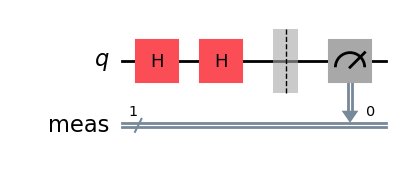

In [22]:
qcoin_0 = QuantumCircuit(1)
qcoin_0.h(0)
qcoin_0.h(0)
qcoin_0.measure_all()

qcoin_0.draw("mpl")

Now, before we use `Sampler` to measure the resulting state, let's think about how this qubit will be transformed by each gate. It starts, as usual, in $|0\rangle$. Then, the first Hadamard transforms the state into the superposition, as we've already seen:

$$
H|0\rangle = \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle.
$$

In this case, both coefficients are fully real and positive, meaning the phase is $\phi=0$.

The second Hadamard is then applied to each piece of the superposition state separately. We already know how the Hadamard transforms the $|0\rangle$ state. But what about $|1\rangle$?

$$
H|1\rangle = \frac{1}{\sqrt{2}} |0\rangle - \frac{1}{\sqrt{2}} |1\rangle
$$

This is, again, an equal superposition of 0 and 1, akin to flipping a coin, but this state's coefficient in front of $|1\rangle$ has a phase of $\phi = \pi$ to give it the negative sign.

#### Check your understanding
Read the question below, think about your answer, then click the triangle to reveal the solution.

<details>
<summary>

Calculate the resulting state after applying the second Hadamard. That is, calculate: $H(\frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle)$. Note that $H$ is distributive, so we can apply it to each of the terms individually.

</summary>

__Answer:__

$$
H(\frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle) = \frac{1}{\sqrt{2}} H|0\rangle + \frac{1}{\sqrt{2}} H|1\rangle = \frac{1}{2} [(|0\rangle + |1\rangle) + (|0\rangle - |1\rangle)] = |0\rangle
$$

</details>

Now let's check our prediction with `Sampler`.

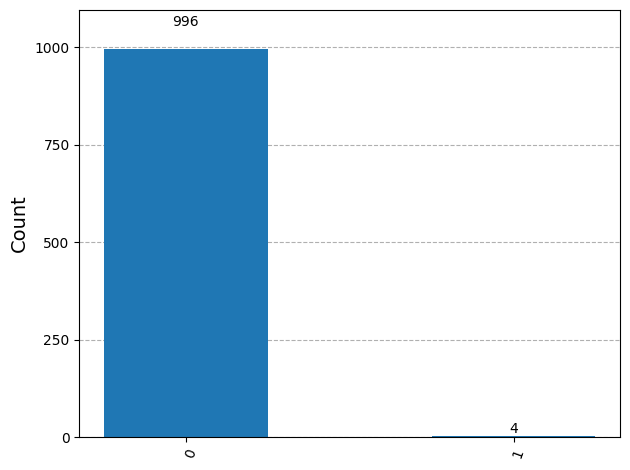

In [23]:
## Transpile

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qcoin_0)

## Execute

# On real hardware:
sampler = Sampler(mode=backend)
pubs = [qc_isa]
job = sampler.run(pubs, shots=1000)
res = job.result()

counts = res[0].data.meas.get_counts()


# or with Aer simulator with noise model from real backend
# job = sampler_sim.run([qc_isa])
# counts=job.result()[0].data.meas.get_counts()

## Analyze
plot_histogram(counts)

The second Hadamard has canceled out the first, and we’ve returned to the 0 state where we started! This is because the Hadamard transforms both the $|0\rangle$ and $|1\rangle$ states to similar states, but with opposite phases. After the second Hadamard, we see that the $|0\rangle$ terms interfere constructively, but the $|1\rangle$ terms interfere destructively and cancel each other out.


Let’s explore further: we can change the phase using a "PHASE” gate. So now let’s apply a Hadamard to create the superposition, apply a phase shift of $\pi$ radians, then apply the second Hadamard:

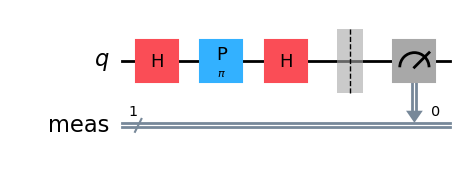

In [24]:
qcoin_pi = QuantumCircuit(1)
qcoin_pi.h(0)
qcoin_pi.p(np.pi, 0)
qcoin_pi.h(0)
qcoin_pi.measure_all()

qcoin_pi.draw("mpl")

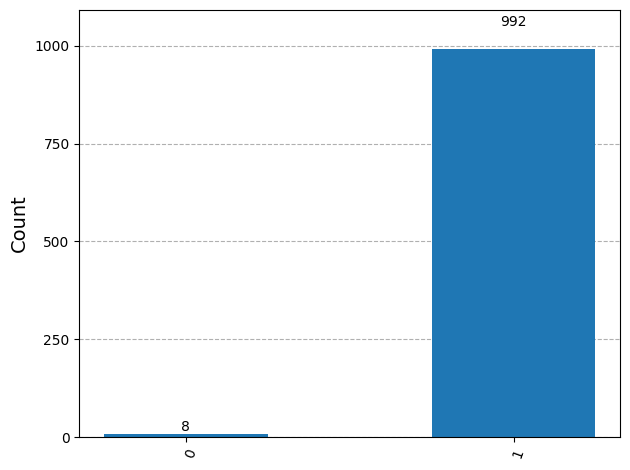

In [25]:
## Transpile

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qcoin_pi)

## Execute

# On real hardware:
sampler = Sampler(mode=backend)
pubs = [qc_isa]
job = sampler.run(pubs, shots=1000)
res = job.result()

counts = res[0].data.meas.get_counts()


# or with Aer simulator with noise model from real backend
# job = sampler_sim.run([qc_isa])
# counts=job.result()[0].data.meas.get_counts()

## Analyze
plot_histogram(counts)

And now the qubit is measured to be in the 1 state instead of 0.

So, even from these few, simple experiments, you can already see the drastic difference this phase can make on a quantum circuit. It can be subtle and hard to see at first. In our first experiment, where we simply tossed our quantum coin with a Hadamard gate and measured the outcome of the flip revealed nothing of the effect of the phase. It was only when we dug deeper that we discovered the difference a phase can make. It can cause the same quantum gate to have quite literally the opposite effect on a qubit.


#### Try it yourself:
Edit the code cell below to change the phase such that the second Hadamard creates a superposition state with probabilities of 25% and 75% of finding the state in $|0\rangle$ and $|1\rangle$, respectively. Verify your answer with math.

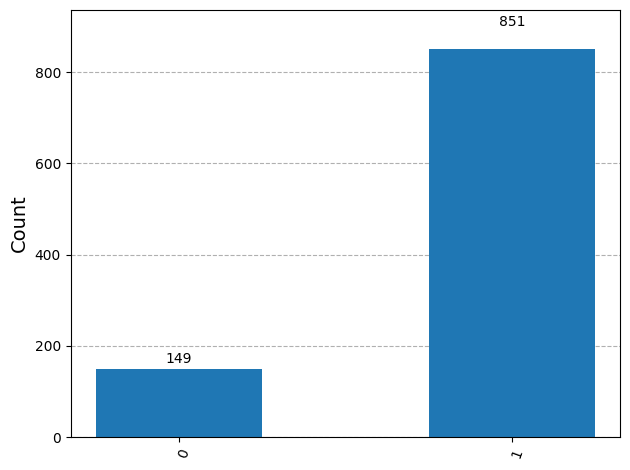

In [38]:
qcoin_phase = QuantumCircuit(1)
qcoin_phase.h(0)
# replace "x" below with a phase from 0 to 2*np.pi (this cell won't run if you leave x)
qcoin_phase.rz(0.75*np.pi, 0)
qcoin_phase.h(0)
qcoin_phase.measure_all()


## Transpile

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qcoin_phase)

## Execute

# On real hardware:
sampler = Sampler(mode=backend)
pubs = [qc_isa]
job = sampler.run(pubs, shots=1000)
res = job.result()

counts = res[0].data.meas.get_counts()


# or with Aer simulator with noise model from real backend
# job = sampler_sim.run([qc_isa])
# counts=job.result()[0].data.meas.get_counts()

## Analyze
plot_histogram(counts)

## Another (better) coin analogy using the $\sqrt{\text{NOT}}$ gate

By now we've learned that the act of flipping a coin is pretty different from creating a superposition state. Is there a better analogy we could make to a coin that captures more of the superposition-like phenomena? Yes. Yes there is.

We're going to do another thought experiment with a coin. Imagine the coin sitting on the table, heads up. To make it heads down, we can simply flip it over. This is the computational equivalent of a "NOT" gate.

Say we want to construct an operation that, if applied twice, would be equivalent to the NOT gate. That is, we want a "squareroot of NOT," or $\sqrt{\text{NOT}}$. We can do this by considering how the NOT gate is physically implemented on the coin: it's just a rotation of 180 degrees around, for example, the x-axis. So, if we were to rotate the coin just 90 degrees around the x-axis, it would be equivalent to a $\sqrt{\text{NOT}}$ gate.

Imagine that after applying the $\sqrt{\text{NOT}}$ gate, we want to ask whether the coin is heads up or heads down. It's neither - it's standing on its edge relative to the vertical axis. But now, let's redefine our "measurement" of the coin to be first, collapsing the coin along the measurement axis (by squashing it with your hand so that it's lying flat), and second, checking whether it's heads up or down.

If we perform this "measurement" on the coin standing on its edge, then the coin will "collapse" to heads up and heads down with equal probability. Much like the coin flip, in principle, the direction that the coin falls can be predicted based on the initial conditions of the coin and how exactly the force of our hand is applied to the coin to "collapse" it. But in practice, it should be difficult to predict which side will land up, so it is essentially random.

We can actually measure this coin along three different axes: $x$, $y$, and $z$. We see that the coin's edge is pointing along the $x$ and $z$, so measurement in those directions requires "collapsing" the coin - hence, along those axes, there will be random with 50:50 probability of measuring heads up and down. But along the $y$-axis, it's already flat, with its head facing the -y direction. We can call that "heads forward."

So, while the x and z measurements yielded random results, the y measurement will alway yield the same result! If you recall the "quantum coin flip" experiment from the previous section, this is reminiscent to how the quantum coin behaved. It was measured to be 0 or 1  with 50/50 probability in the z-direction, but always $|+\rangle$ and never $|-\rangle$ along X.  **This is suggestive that perhaps a coin sitting still, on its edge, is a better way to visualize a superposition state of a qubit than coin wildly flipping through the air.**

Let's use Qiskit to see if our "quantum coin" behaves the same way as our classical coin when a $\sqrt{\text{NOT}}$ gate is applied. We'll apply $\sqrt{\text{NOT}}$ to a qubit starting in $|0\rangle$, then use `Estimator` to check the expectation value of the three observables, X, Y, and Z.

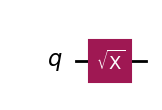

In [27]:
qcoin_sx = QuantumCircuit(1)
qcoin_sx.sx(0)

qcoin_sx.draw("mpl")

In [28]:
obs1 = Pauli("X")
obs2 = Pauli("Y")
obs3 = Pauli("Z")


# Step 2: Transpile the circuit

pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qcoin_sx)
obs1_isa = obs1.apply_layout(layout=qc_isa.layout)
obs2_isa = obs2.apply_layout(layout=qc_isa.layout)
obs3_isa = obs3.apply_layout(layout=qc_isa.layout)


# Step 3: Run the circuit on a real quantum computer

estimator = Estimator(mode=backend)
pubs = [(qc_isa, [[obs1_isa], [obs2_isa], [obs3_isa]])]
job = estimator.run(pubs)
res = job.result()

# Run the job on the Aer simulator with noise model from real backend
# pubs = [(qc_isa, [[obs1_isa], [obs2_isa], [obs3_isa]])]
# job = estimator_sim.run(pubs)
# res=job.result()

# Step 4: Return the result in classical form, and analyze.

print(res[0].data.evs)

[[ 0.02744229]
 [-0.99478311]
 [-0.04688058]]


The expectation values are 0, -1, and 0 for X, Y and Z, respectively.

#### Check your understanding
Read the question below, think about your answer, then click the triangle to reveal the solution.
<details>
<summary>


Given the expectation values, what are the probabilities of measuring the quantum coin to be heads up/down (or left/right or forward/back) for each of the 3 measurement axes?

</summary>

__Answer:__

There is a 50/50 probability of measuring either state along X and Z, and the state is always measured in the -y direction along Y.

</details>

This is the same result we got with our thought experiment applying a "$\sqrt{\text{NOT}}$" 90-degree rotation on the classical coin. In fact, there is a precise analogy between the coin and the qubit state now. We can visualize the qubit state as a vector pointing in the direction of heads on a coin, normal to the surface of the coin. So, heads up, or the $|0\rangle$ state on a quantum coin, is equivalent to a vector pointing straight up; heads down, or $|1\rangle$, is pointing straight down. Any equal superposition of $|0\rangle$ and $|1\rangle$ points horizontally. The phase of the state determines the exact horizontal direction - the direction it points along the equator is equal to the direction the coefficient $c_2$ points in the complex plane.

Now, *every* gate that we've seen in this notebook can be visualized as a rotation (or series of rotations) of the coin/vector.


 - NOT: 180 degrees around the x-axis

 - $\sqrt{\text{NOT}}$: 90 degrees around the x-axis

 - PHASE: rotation of $\phi$ around z-axis

 - Hadamard: This one's a bit trickier. We initially likened it to flipping a coin, making the coin spin uncontrollably in the air. But the Hadamard is actually a controlled, deterministic rotation of the coin, like the other gates. The Hadamard is performed by rotating 90 degrees around the y-axis, then 180 degrees around the x-axis.

So, there's nothing random about a quantum superposition state or any of the standard operations we perform on the qubit. Every operation is deterministic and reversible. The only time randomness comes into play is when we decide to *measure* the quantum state.


### The qubit state as a Bloch vector

This vector that points in the direction of the coin's "head" is known as a "Bloch vector." Formally, an arbitrary (isolated) qubit state can be represented by a vector that lies on the surface of a sphere of radius 1 with coordinates $(r, \theta, \phi)$. Written in terms of these coordinates, the qubit state is:

$|\psi\rangle = \cos{\frac{\theta}{2}} |0\rangle + e^{i \phi} \sin{\frac{\theta}{2}} |1\rangle$

![A diagram of the Bloch sphere. The quantum state is a vector in three dimensions. Since it can point in any direction, the quantum state can be specified using polar angles theta and phi to locate a point on a spherical surphace.](/learning/images/modules/quantum-mechanics/superposition-with-qiskit/bloch-sphere.avif)

Now let's check with Qiskit about how the Bloch vector changes when we apply various gates to our qubit starting from the $|0\rangle$ state.

#### NOT

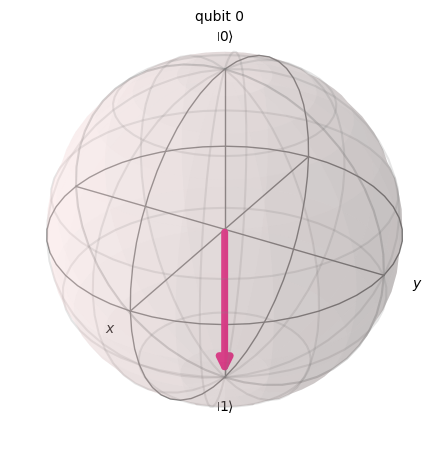

In [40]:
from qiskit.visualization import plot_bloch_multivector

qnot = QuantumCircuit(1)
qnot.x(0)

plot_bloch_multivector(qnot)

#### $\sqrt{\text{NOT}}$

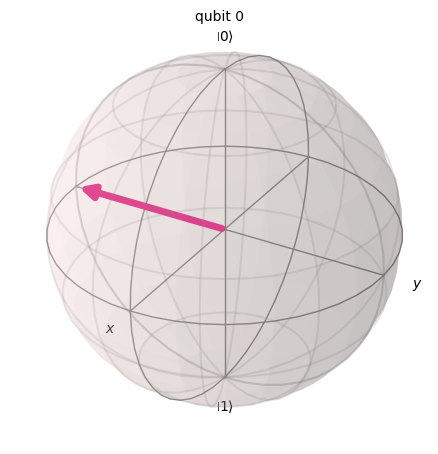

In [41]:
qsqrtnot = QuantumCircuit(1)
qsqrtnot.sx(0)

plot_bloch_multivector(qsqrtnot)

#### PHASE ($\phi = \pi$)

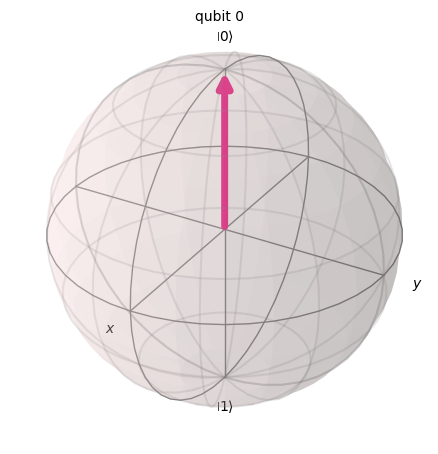

In [42]:
qphase = QuantumCircuit(1)
qphase.p(np.pi, 0)

plot_bloch_multivector(qphase)

#### Hadamard

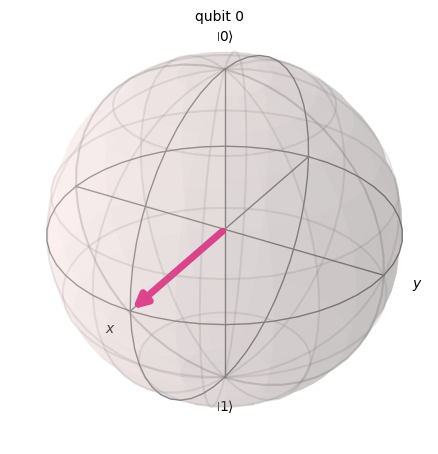

In [43]:
qhadamard = QuantumCircuit(1)
qhadamard.h(0)

plot_bloch_multivector(qhadamard)

## Conclusion - so what *is* a superposition state?

We started this module comparing the randomness of measuring a quantum superposition state to a coin flip. We likened the "Hadamard gate" that produces a quantum superposition to the act of flipping a coin. But, through a series of experiments, we learned that there are fundamental differences between a classical coin flip and a quantum superposition.

We learned that there is actually nothing "random" about a qubit in a superposition state. It is like a coin sitting still in three-dimensional space. In fact, a coin that is free to rotate in 3 dimensions is a very close analogy to a particular way to visualize the quantum state of a qubit, called the Bloch vector. Quantum gates rotate this coin/Bloch vector deterministically and reversibly. It is only when we **measure** the qubit that any randomness is introduced. We compared this measurement process to squashing the coin so that it lies flat in the direction of the measurement axis.

Whether a quantum state is even in a superposition is really just in the eye of the beholder. As you've likely encountered before, we are free to choose our coordinate system - $x$, $y$, and $z$ can point along any three orthogonal directions. So, if we have a superposition of 0 and 1 in one coordinate system, we can define a new coordinate system - or equivalently, a new "measurement basis" - in which the state is pointing purely in the $+z$ direction, and therefore not in a superposition state. So, when we say a qubit is in a superposition, we must also answer the question, "superposition of *what*?"

You may leave this module with the impression that we've just removed all the mystery from quantum mechanics. After all, one of the supposedly "weirdest" aspects, the superposition state of a qubit, is really just as simple as a three-dimensional vector. But keep in mind that the coin is still only an analogy, and even the Bloch vector is only a visualization tool to calculate probabilities of measurement outcomes. We can’t say what a quantum state is *really* doing before it's measured. Because, checking that requires a measurement!

We will discuss this conundrum of what is the “true” nature of a quantum state, how the quantum phenomenon of entanglement can help us elucidate this, in the Bell's Inequality module.

## Questions

Instructors can request versions of these notebooks with answer keys and guidance on placement in common curricula by filling out this [quick survey](https://ibm.biz/classrooms_instructor_key_request) on how the notebooks are being used.

### Critical concepts:

- While the measurement of a qubit in a superposition is probabilistic, like flipping a coin, the superposition state itself behaves differently than a flipping coin.
- A main difference between a classical probability distribution and a superposition is that the superposition has *phase* coherence, which allows it to interfere constructively or destructively.
- The state of a single, isolated qubit can be visualized as a point on the so-called "Bloch sphere," where the relative amplitudes of the $|0\rangle$ and $|1\rangle$ components determine the polar angle $\theta$ and the relative phases between the two components determine the azimuthal angle $\phi$.
- All single-qubit quantum gates can be viewed as rotations of the vector on this sphere.

### T/F questions:

1. T/F A quantum superposition is basically the same as a probabilistic event in classical physics, like flipping a coin.

2. T/F The length of the Bloch vector describing the state of a single isolated qubit is always 1.

3. T/F Single-qubit quantum gates do not change the length of the Bloch vector.


### MC questions:

1. Select the correct Bloch vector that represents the state $|\Psi\rangle = \sqrt{\frac{1}{3}}|0\rangle + e^{i \pi / 4} \sqrt{\frac{2}{3}}|1\rangle$ :


![Four Bloch spheres are shown. The vector points nearly along +x in option a, halfway between +x and +y and slightly below the xy plane in option b, between +x and -y, and slightly above the xy plane in option c, and along -x in option d. ](/learning/images/modules/quantum-mechanics/superposition-with-qiskit/mc-question.avif)


2. The Bloch sphere describes a qubit's:
   (select all that apply)

   a. amplitude

   b. entanglement with other qubits

   c. phase

   d. color

   e. probability of measurement outcomes


### Discussion questions:

1. Why can the state of a qubit be visualized on the Bloch sphere, but the probability distribution of a coin flip cannot?


2. Why is a coin flipping in the air not the best analogy to a quantum superposition state? What aspect of superpositions are not captured in this analogy?


### Challenge problems:

1. Use Qiskit to create a circuit that transforms the state $|0\rangle$ to the state $\frac{\sqrt{3}}{2}|0\rangle + \frac{1}{2}e^{i \frac{5\pi}{6}}|1\rangle$